In [1]:
import pandas as pd

# Import des données avec Pandas (IO)

La gestion des données d'entrée est un point critique : ces données peuvent être fournis sous forme de fichiers textes (type .csv), sous forme de tableurs excel / libreoffice calc, extraits depuis une page web, lu depuis une base de donnée locale ou distante....

Pandas permet de lire la plupart de ces formats de donnée et plus encore de façon native. Pour se rendre compte des possibilités, il suffit de faire

`pd.read_` + `TAB`

In [2]:
pd.read_

AttributeError: module 'pandas' has no attribute 'read_'

In [ ]:
print(*[function_name for function_name in dir(pd) if "read_" in function_name], sep="\n")

Certaines de ces fonctions nécessitent des dépendances optionnelles, comme `read_excel`

In [3]:
pd.read_excel("test.xls")

ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd.

Ces dépendances sont installable avec `pip` ou `conda`.

## Données textes (.txt, .csv, .tsv...)

Ce sont des formats très communs que vous allez rencontrer régulièrement. C'est un formalisme stock les données dans un fichier textes, les lignes séparés par un retour à la lignes et les colonnes par un *délimiteur*, souvent (mais pas toujours) la virgule. Un fichier CSV (comma separated values) sont supposés utiliser la virgule comme séparateurs, les TSV (tabulation separated values) une tabulation, etc.

On rencontre les fichiers formalisés pour la langue française séparés par un point-virgule (;). C'est dû à notre utilisation de la virgule (,) pour séparer les décimales.

Il existe également des fichiers dits "à espacement fixe" (Fixed Width File, ou fwf), où les données sont alignés et donc séparés par un nombre variable d'espaces blanc.

Les fichiers CSV contiennent normalement un *header* indiquant le nom des colonnes. Ils peuvent contenir des commentaires, à conditions que ceux si soit précédés d'un caractère spécifique (comme un dièse #).

Chaques lignes contiennent le même nombre de colonnes.

Par exemple, pour un csv correctement formaté, en demandant de prendre la première colonne comme index (par défaut, pandas assigne un index unique allant de 0 au nombre de lignes) :

In [4]:
df = pd.read_csv("../../data/temperatures.csv", index_col=0)
df

,temp_inside,temp_outside
date and time,,
2018-01-01 00:00:00,23.0,7.5
2018-01-01 00:01:00,23.0,7.5
2018-01-01 00:02:00,23.0,7.3
2018-01-01 00:03:00,23.0,7.4
2018-01-01 00:04:00,23.0,7.4
...,...,...
2018-01-31 23:55:00,23.0,8.6
2018-01-31 23:56:00,23.0,8.6
2018-01-31 23:57:00,23.0,8.8


### Fichiers textes de piètre qualité

Les éléments indiqués précédéments correspondent au cas idéal. Petit medley des cas possibles qui pourront poser problème :

- Plusieurs tableau de donnée dans un même fichiers, avec ou sans indicateurs de début et de fin
- Nombre variable de colonne
- Délimitateurs qui changent au milieu du fichier
- Commentaires sans caractères indicateurs

Certains cas de figure pourront être gérés par pandas, d'autres nécessiteront de nettoyer le fichier au préalable.

#### Spécifier les délimiteurs de colonne et de décimales

In [5]:
df = pd.read_csv("../../data/bad_csv/temperatures_french_dec.csv")
df

,,date and time;temp_inside;temp_outside
2018-01-01 00:00:00;23,0;7,5
2018-01-01 00:01:00;23,0;7,5
2018-01-01 00:02:00;23,0;7,3
2018-01-01 00:03:00;23,0;7,4
2018-01-01 00:04:00;23,0;7,4
...,...,...
2018-01-31 23:55:00;23,0;8,6
2018-01-31 23:56:00;23,0;8,6
2018-01-31 23:57:00;23,0;8,8
2018-01-31 23:58:00;23,0;8,7


In [6]:
df = pd.read_csv("../../data/bad_csv/temperatures_french_dec.csv",
                 delimiter=";", index_col=0)
df

,temp_inside,temp_outside
date and time,,
2018-01-01 00:00:00,"23,0","7,5"
2018-01-01 00:01:00,"23,0","7,5"
2018-01-01 00:02:00,"23,0","7,3"
2018-01-01 00:03:00,"23,0","7,4"
2018-01-01 00:04:00,"23,0","7,4"
...,...,...
2018-01-31 23:55:00,"23,0","8,6"
2018-01-31 23:56:00,"23,0","8,6"
2018-01-31 23:57:00,"23,0","8,8"


In [7]:
df.temp_inside.plot()

TypeError: no numeric data to plot

In [8]:
df = pd.read_csv("../../data/bad_csv/temperatures_french_dec.csv",
                 delimiter=";", decimal=",", index_col=0)
df

,temp_inside,temp_outside
date and time,,
2018-01-01 00:00:00,23.0,7.5
2018-01-01 00:01:00,23.0,7.5
2018-01-01 00:02:00,23.0,7.3
2018-01-01 00:03:00,23.0,7.4
2018-01-01 00:04:00,23.0,7.4
...,...,...
2018-01-31 23:55:00,23.0,8.6
2018-01-31 23:56:00,23.0,8.6
2018-01-31 23:57:00,23.0,8.8


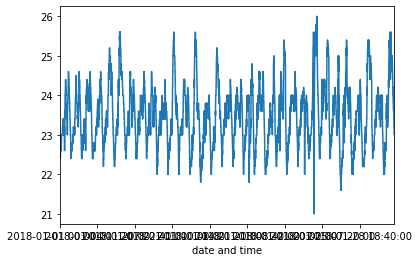

In [9]:
df.temp_inside.plot()

#### Spécifier un caractère de commentaire

In [10]:
!head "../../data/bad_csv/temperatures_comments.csv"

# this is a clever comment
# on multiline
# not annoying, because of the # !
date and time,temp_inside,temp_outside
2018-01-01 00:00:00,23.0,7.5
2018-01-01 00:01:00,23.0,7.5 # this line is strange no?
2018-01-01 00:02:00,23.0,7.3
2018-01-01 00:03:00,23.0,7.4
2018-01-01 00:04:00,23.0,7.4
2018-01-01 00:05:00,23.0,7.3


In [11]:
pd.read_csv("../../data/bad_csv/temperatures_comments.csv")

ParserError: Error tokenizing data. C error: Expected 1 fields in line 3, saw 2


In [12]:
pd.read_csv("../../data/bad_csv/temperatures_comments.csv", comment="#", index_col=0)

,temp_inside,temp_outside
date and time,,
2018-01-01 00:00:00,23.0,7.5
2018-01-01 00:01:00,23.0,7.5
2018-01-01 00:02:00,23.0,7.3
2018-01-01 00:03:00,23.0,7.4
2018-01-01 00:04:00,23.0,7.4
...,...,...
2018-01-31 23:55:00,23.0,8.6
2018-01-31 23:56:00,23.0,8.6
2018-01-31 23:57:00,23.0,8.8


#### Ignorer un certain nombre de lignes en entête ou en pied de fichier

In [13]:
!tail "../../data/bad_csv/temperatures_skip.csv"

2018-01-31 23:52:00,23.0,8.5
2018-01-31 23:53:00,23.0,8.6
2018-01-31 23:54:00,23.0,8.5
2018-01-31 23:55:00,23.0,8.6
2018-01-31 23:56:00,23.0,8.6
2018-01-31 23:57:00,23.0,8.8
2018-01-31 23:58:00,23.0,8.7
2018-01-31 23:59:00,23.0,8.6

Author: Nicolas Cellier

In [14]:
pd.read_csv("../../data/bad_csv/temperatures_skip.csv")

,,File created on 20/02/2020
date and time,temp_inside,temp_outside
2018-01-01 00:00:00,23.0,7.5
2018-01-01 00:01:00,23.0,7.5
2018-01-01 00:02:00,23.0,7.3
2018-01-01 00:03:00,23.0,7.4
...,...,...
2018-01-31 23:56:00,23.0,8.6
2018-01-31 23:57:00,23.0,8.8
2018-01-31 23:58:00,23.0,8.7
2018-01-31 23:59:00,23.0,8.6


In [15]:
pd.read_csv("../../data/bad_csv/temperatures_skip.csv",
            skiprows=2, skipfooter=2)

/home/nicolas/minimamba/envs/stats/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,date and time,temp_inside,temp_outside
0,2018-01-01 00:00:00,23.0,7.5
1,2018-01-01 00:01:00,23.0,7.5
2,2018-01-01 00:02:00,23.0,7.3
3,2018-01-01 00:03:00,23.0,7.4
4,2018-01-01 00:04:00,23.0,7.4
...,...,...,...
44635,2018-01-31 23:55:00,23.0,8.6
44636,2018-01-31 23:56:00,23.0,8.6
44637,2018-01-31 23:57:00,23.0,8.8
44638,2018-01-31 23:58:00,23.0,8.7


#### Spécifier les nom des colonnes en cas d'absence de header

In [16]:
pd.read_csv("../../data/bad_csv/temperatures_no_header.csv")

,2018-01-01 00:00:00,23.0,7.5
0,2018-01-01 00:01:00,23.0,7.5
1,2018-01-01 00:02:00,23.0,7.3
2,2018-01-01 00:03:00,23.0,7.4
3,2018-01-01 00:04:00,23.0,7.4
4,2018-01-01 00:05:00,23.0,7.3
...,...,...,...
44634,2018-01-31 23:55:00,23.0,8.6
44635,2018-01-31 23:56:00,23.0,8.6
44636,2018-01-31 23:57:00,23.0,8.8
44637,2018-01-31 23:58:00,23.0,8.7


In [17]:
pd.read_csv("../../data/bad_csv/temperatures_no_header.csv", header=None)

,0,1,2
0,2018-01-01 00:00:00,23.0,7.5
1,2018-01-01 00:01:00,23.0,7.5
2,2018-01-01 00:02:00,23.0,7.3
3,2018-01-01 00:03:00,23.0,7.4
4,2018-01-01 00:04:00,23.0,7.4
...,...,...,...
44635,2018-01-31 23:55:00,23.0,8.6
44636,2018-01-31 23:56:00,23.0,8.6
44637,2018-01-31 23:57:00,23.0,8.8
44638,2018-01-31 23:58:00,23.0,8.7


In [18]:
pd.read_csv("../../data/temperatures.csv",
            header=0, names=["temp_i", "temp_outside"])

,temp_i,temp_outside
2018-01-01 00:00:00,23.0,7.5
2018-01-01 00:01:00,23.0,7.5
2018-01-01 00:02:00,23.0,7.3
2018-01-01 00:03:00,23.0,7.4
2018-01-01 00:04:00,23.0,7.4
...,...,...
2018-01-31 23:55:00,23.0,8.6
2018-01-31 23:56:00,23.0,8.6
2018-01-31 23:57:00,23.0,8.8
2018-01-31 23:58:00,23.0,8.7


## Base de donnée

Il est possible de lire une base de donnée locale ou distante avec Pandas. Il est toutefois nécessaire d'avoir des bases en SQL pour manipuler des bases un tant soit peu complexes. C'est au dela du scope de la formation, mais plus d'information sont disponible dans [la documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql.html), ou dans l'article suivant :
https://www.dataquest.io/blog/python-pandas-databases/

## Web

Deux cas de figure peuvent être intéressants :

- les données sont disponible sous forme de tableau dans une *page html*.
- les données sont disponibles sous forme csv ou json via une requète web.

### Lecture de page web

Dans le cas où vous deviez extraire des données depuis une page web qui contiendrais des tableau, il suffit d'utiliser `pd.read_html`. Une liste de DataFrame pandas sera retourné, un dataframe par tableau de la page web.

Il est nécessaire d'installer `lxml`, `html5lib` et `bs4` avec `pip install lxml html5lib bs4`

In [21]:
diffusivity_df = pd.read_html("https://en.wikipedia.org/wiki/Thermal_diffusivity")[0]
diffusivity_df

,Material,Thermal diffusivity (mm²/s),Refs.
0,"Pyrolytic graphite, parallel to layers",1220,NaN
1,"Silver, pure (99.9%)",165.63,NaN
2,Gold,127,[12]
3,Copper at 25 °C,111,[13]
4,Aluminium,97,[12]
5,Al-10Si-Mn-Mg (Silafont 36) at 20 °C,74.2,[14]
6,Aluminium 6061-T6 Alloy,64,[12]
7,Al-5Mg-2Si-Mn (Magsimal-59) at 20 °C,44.0,[15]
8,"Steel, AISI 1010 (0.1% carbon)",18.8,[16]
9,"Steel, 1% carbon",11.72,NaN


In [24]:
diffusivity_df["Thermal diffusivity (mm²/s)"].str.split("-")

0              [1220]
1            [165.63]
2               [127]
3               [111]
4                [97]
5              [74.2]
6                [64]
7              [44.0]
8              [18.8]
9             [11.72]
10              [4.2]
11            [3.352]
12            [3.428]
13             [54.3]
14               [23]
15               [88]
16              [1.4]
17            [216.5]
18             [12.0]
19             [0.83]
20            [9.142]
21            [8.605]
22            [0.144]
23            [0.096]
24            [0.081]
25             [0.08]
26            [0.124]
27            [0.143]
28             [0.07]
29            [23.38]
30               [19]
31               [22]
32              [190]
33              [160]
34               [22]
35              [3.6]
36             [1.15]
37               [40]
38             [0.52]
39             [0.27]
40             [0.34]
41    [0.089 ,  0.13]
42             [0.09]
43            [0.082]
44           [0.0738]
Name: Ther

Comme vous pouvez le voir, il est nécessaire de faire un certain nombre de nettoyage : les données sont souvent là pour l'affichage et ne peuvent être traités directement (3.6 × 10−6 	doit être transformé en 3.6e-6, il y a des intervalles de valeurs qui ne peuvent pas être traités directement...).

### API web

La meilleur solution pour récupérer des données est encore quand une API (Application programming interface) est disponible. Dans ce cas, il va être possible de récupérer directement les données sous forme numérique exploitable. On utilise alors directement `pd.read_csv` avec l'URL de l'API pour récupérer les données. Dans certain cas, les données sont disponible en **json**, un format tiré du javascript qui ressemble au formalisme utilisé dans les dictionnaires python. Dans ce cas, on utilise `pd.read_json` avec l'url de l'API.

#### Exemple de JSON
```json
{
    "menu": {
        "id": "file",
        "value": "File",
        "popup": {
            "menuitem": [
                { "value": "New", "onclick": "CreateNewDoc()" },
                { "value": "Open", "onclick": "OpenDoc()" },
                { "value": "Close", "onclick": "CloseDoc()" }
            ]
        }
    }
}
```

Il est souvent possible d'obtenir une clé permettant d'accéder aux donnée en s'inscrivant aux site fournissant ces services : prenons l'exemple de OpenWeatherMap. Une fois inscrit, une API Key est disponible sur le site. 

Pour la mienne, c'est `b6bde395c367a4bc5c0ecb353978a2e3`.

Il est possible d'accéder aux données météo actuelles avec l'adresse

http://api.openweathermap.org/data/2.5/forecast?q={city name}&appid={your api key}.

On peut essayer avec Lyon par exemple.

http://api.openweathermap.org/data/2.5/forecast?q=Lyon&appid=b6bde395c367a4bc5c0ecb353978a2e3

Ce qui devrait afficher les données sous forme json dans votre navigateur. On voit assez vite qu'il y aura un soucis : on est interessé par l'objet "main" de chaques éléments de la clé "list". Si le formattage était plus direct, on aurait pu utiliser directement read_json, mais il faudra ici transformer le résultat à la main.

In [25]:
import requests

In [40]:
url = "http://api.openweathermap.org/data/2.5/forecast?q=Chicago&appid=b6bde395c367a4bc5c0ecb353978a2e3"
response = requests.get(url)
print(response)
rows = response.json()["list"]

<Response [200]>


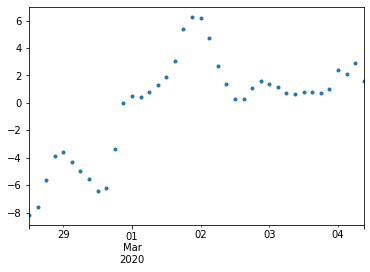

In [41]:
dates = [row["dt_txt"] for row in rows] # on récupère les dates correspondantes à chaques lignes
dates = pd.to_datetime(dates) # on convertit ça automatiquement en "vrai" dates
df = pd.DataFrame([row["main"] for row in rows], # on récupère les données de chaques lignes
                  index=dates)
(df.temp - 273.15).plot(linestyle="", marker=".")